# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [28]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [30]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [31]:
# Create a Beautiful Soup Object
html = browser.html
soup_object = soup(html,'html.parser')

# # This can also be achieved by using the Pandas read_html function:
# df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
# html_df=df[0]
# html_df

In [32]:
# Extract all rows of data
table_elements = soup_object.find('table',class_='table')
for row in table_elements:
    print(row.text)




id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [33]:
# Create an empty list
id_list = []
terrestrial_date_list = []
sol_list = []
ls_list = []
month_list = []
min_temp_list = []
pressure_list = []

# Loop through the scraped data to create a list of rows
for row in table_elements.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')

    if(columns != []):
        id = columns[0].text.strip()
        id_list.append(id)

        terrestrial_date = columns[1].text.strip()
        terrestrial_date_list.append(terrestrial_date)

        sol = columns[2].text.strip()
        sol_list.append(sol)

        ls = columns[3].text.strip()
        ls_list.append(ls)

        month = columns[4].text.strip()
        month_list.append(month)

        min_temp = columns[5].text.strip()
        min_temp_list.append(min_temp)

        pressure = columns[6].text.strip()
        pressure_list.append(pressure)

In [34]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df = pd.DataFrame({'id': id_list,  'terrestrial_date': terrestrial_date_list, 'sol': sol_list, 'ls': ls_list, 'month': month_list, 'min_temp': min_temp_list, 'pressure':pressure_list})

In [35]:
# Confirm DataFrame was created successfully
table_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [36]:
# Examine data type of each column
table_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [37]:
# Change data types for data analysis
table_df_astypes = table_df.astype({'id': 'object', 'terrestrial_date': 'datetime64[ns]', 'sol': 'int64', 'ls': 'int64', 'month': 'int64', 'min_temp': 'float64', 'pressure':'float64'})

In [38]:
# Confirm type changes were successful by examining data types again
table_df_astypes.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [39]:
# 1. How many months are there on Mars?
months_in_Mars = table_df_astypes['month'].groupby(table_df_astypes['month']).count()
months_in_Mars

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [40]:
# 2. How many Martian days' worth of data are there?
Martian_days = table_df_astypes['sol'].count()
Martian_days

1867

In [41]:
# 3. What is the average low temperature by month?
Avg_lowtemp_in_Mars = table_df_astypes['min_temp'].groupby(table_df_astypes['month']).mean()
Avg_lowtemp_in_Mars

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [42]:
Coldest_month = Avg_lowtemp_in_Mars[Avg_lowtemp_in_Mars == Avg_lowtemp_in_Mars.min()].index[0]
Coldest_month_temp = Avg_lowtemp_in_Mars.min()
print(Coldest_month, Coldest_month_temp)
Warmest_month = Avg_lowtemp_in_Mars[Avg_lowtemp_in_Mars == Avg_lowtemp_in_Mars.max()].index[0]
Warmest_month_temp = Avg_lowtemp_in_Mars.max()
print(Warmest_month,Warmest_month_temp)

3 -83.30729166666667
8 -68.38297872340425


<Axes: xlabel='month', ylabel='Temperature in Celsius'>

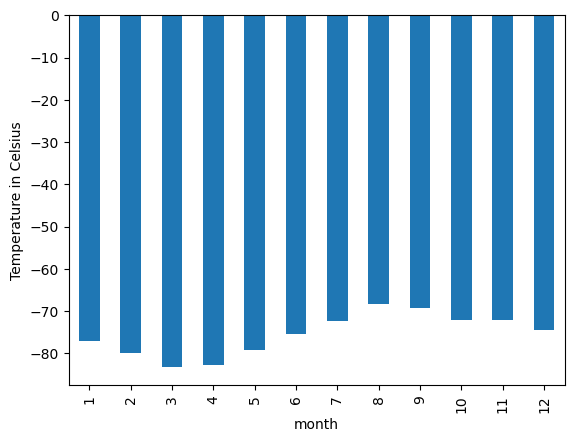

In [43]:
# Plot the average temperature by month
Avg_lowtemp_in_Mars_df = pd.DataFrame(Avg_lowtemp_in_Mars)
Avg_lowtemp_in_Mars_df.plot(kind="bar",xlabel='month',ylabel='Temperature in Celsius',legend=False)

<Axes: xlabel='month', ylabel='Temperature in Celsius'>

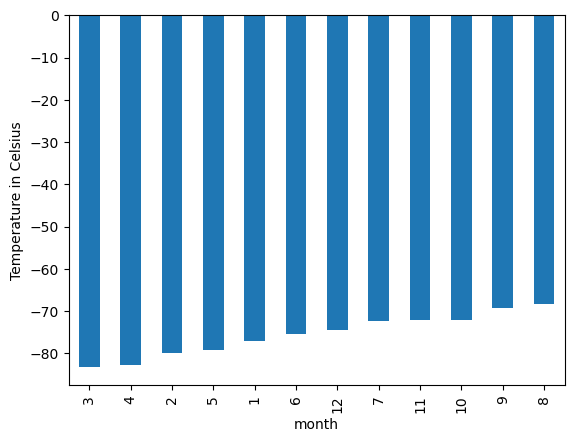

In [44]:
# Identify the coldest and hottest months in Curiosity's location
Avg_lowtemp_in_Mars_df.sort_values(['min_temp']).plot(kind="bar",xlabel='month',ylabel='Temperature in Celsius',legend=False)


In [45]:
# 4. Average pressure by Martian month
Avg_pressure_in_Mars = table_df_astypes['pressure'].groupby(table_df_astypes['month']).mean()
Avg_pressure_in_Mars

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [46]:
Lowest_atmo_month = Avg_pressure_in_Mars[Avg_pressure_in_Mars == Avg_pressure_in_Mars.min()].index[0]
Lowest_atmo = Avg_pressure_in_Mars.min()
print(Lowest_atmo_month, Lowest_atmo)
Highest_atmo_month = Avg_pressure_in_Mars[Avg_pressure_in_Mars == Avg_pressure_in_Mars.max()].index[0]
Highest_atmo = Avg_pressure_in_Mars.max()
print(Highest_atmo_month,Highest_atmo)

6 745.0544217687075
9 913.3059701492538


<Axes: xlabel='month', ylabel='Atmospheric Pressure'>

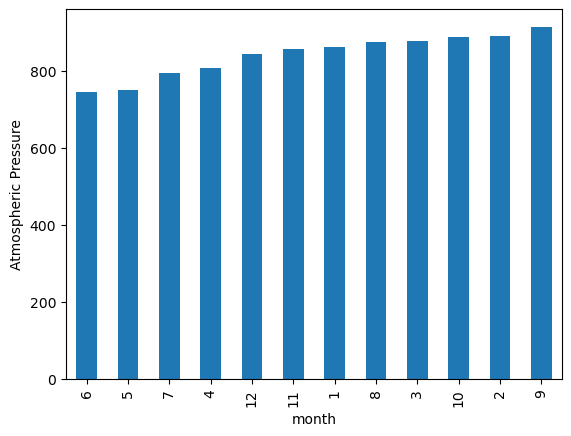

In [47]:
# Plot the average pressure by month
Avg_pressure_in_Mars_df = pd.DataFrame(Avg_pressure_in_Mars)
Avg_pressure_in_Mars_df.sort_values(['pressure']).plot(kind="bar",xlabel='month',ylabel='Atmospheric Pressure',legend=False)

<Axes: xlabel='Number of terrestrial days', ylabel='Minimum temperature'>

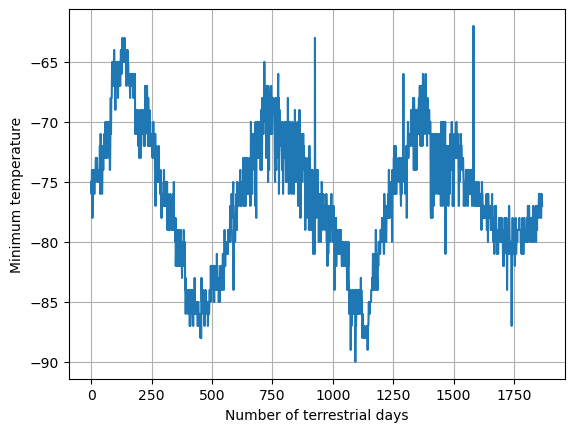

In [95]:
# 5. How many terrestrial (earth) days are there in a Martian year?
daily_min_temp_df = pd.DataFrame(table_df_astypes['min_temp'])
daily_min_temp_df.plot(kind='line',xlabel='Number of terrestrial days',ylabel='Minimum temperature',legend=False,grid=True)

In [101]:
# Visually on the plot, the first high-peak temperature should be in the range of 0-500 terrestrial days. And below we want to find out on which day exectly.
first_summer = daily_min_temp_df.iloc[0:500]
first_peak_day = first_summer[['min_temp']].idxmax()[0]
print(first_peak_day)
# the second high-peak temperature should be in the range of 500-1000 terrestrial days. However, there should be an outliers, which we need to ignore it.
second_summer = daily_min_temp_df.iloc[500:1000]
second_peak_day = second_summer[['min_temp']].idxmax()[0]
print(second_peak_day)
second_summer_2 = second_summer.drop(index=second_peak_day)
second_peak_day_2 = second_summer_2[['min_temp']].idxmax()[0]
print(second_peak_day_2)
# days for 1st peak to peak cycle.
print(second_peak_day_2-first_peak_day)
# the third high-peak temperature should be in the range of 1000-1500 terrestrial days. However, there should be an outliers, which we need to ignore it.
third_summer = daily_min_temp_df.iloc[1000:1500]
third_peak_day = third_summer[['min_temp']].idxmax()[0]
third_summer_2 = third_summer.drop(index=third_peak_day)
third_peak_day_2 = third_summer_2[['min_temp']].idxmax()[0]
print(third_peak_day_2)
# days for 2nd peak to peak cycle.
print(third_peak_day_2-second_peak_day_2)


129
926
716
587
1373
657


In [105]:
import datetime as dt

### Answers to the questions:
print("Answers to the questions:")
print(f'='*50)
# 1. How many months exist on Mars?
print("Question #1: How many months exist on Mars?")
print(f'Answer: There are {len(months_in_Mars)} months exist on Mars.')
print(f'='*50)
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
print("Question #2: How many Martian (and not Earth) days worth of data exist in the scraped dataset?")
print(f'Answer: There are {Martian_days} Martian days worth of data exist in the scraped dataset.')
print(f'='*50)
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
print("Question #3: What are the coldest and the warmest months on Mars (at the location of Curiosity)?")
print(f'Answer: ')
print(f'On Mars, the coldest month is Month #{Coldest_month} with the average min daily temperature of {Coldest_month_temp};')
print(f'while the warmest month is Month #{Warmest_month} with the average min daily temperature of {Warmest_month_temp}.')
print(f'According to recorded researches, if the temperature outside reaches -40 degrees, most humans would die within 10 minutes of exposure.')
print(f'That is said, the weather on Mars is very cold and not suitable for human living.')
print(f'.'*50)
print(f'The average the minimum daily temperature for all of the months are as below:')
print(Avg_lowtemp_in_Mars)
print(f'='*50)
# 4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
print("Question #4: Which months have the lowest and the highest atmospheric pressure on Mars?")
print(f'Answer: ')
print(f'On Mars, the lowest atmospheric pressure month is Month #{Lowest_atmo_month} with the average daily atmospheric pressure of {Lowest_atmo};')
print(f'while the highest atmospheric pressure month is Month #{Highest_atmo_month} with the average daily atmospheric pressure of {Highest_atmo}.')
print(f'Comparing to the standard pressure at sea-level on Earth which is 101,000 Pa, the atmospheric pressure on Mars is much lower.')
print(f'.'*50)
print(f'The the average the daily atmospheric pressure of all the months are as below:')
print(Avg_pressure_in_Mars)
print(f'='*50)
# 5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
print("Question #5: About how many terrestrial (Earth) days exist in a Martian year?")
print(f'Answer: ')
print(f'Based on the daily minimum temperature line plot, from peak to peak, there are 2 cycles observed.')
print(f'The 1st cycles starts from terrestrial day #{first_peak_day} to day #{second_peak_day_2}, and there are {second_peak_day_2-first_peak_day} days in this Martian year.'  )
print(f'The 2nd cycles starts from terrestrial day #{second_peak_day_2} to day #{third_peak_day_2}, and there are {third_peak_day_2-second_peak_day_2} days in this Martian year.'  )
print(f'Comparing to the official information, which a Mars year is equal to 687 Earth days, the temperature-based visual estimated result is less Earth days than it should be on Mars.')


Answers to the questions:
Question #1: How many months exist on Mars?
Answer: There are 12 months exist on Mars.
Question #2: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
Answer: There are 1867 Martian days worth of data exist in the scraped dataset.
Question #3: What are the coldest and the warmest months on Mars (at the location of Curiosity)?
Answer: 
On Mars, the coldest month is Month #3 with the average min daily temperature of -83.30729166666667;
while the warmest month is Month #8 with the average min daily temperature of -68.38297872340425.
According to recorded researches, if the temperature outside reaches -40 degrees, most humans would die within 10 minutes of exposure.
That is said, the weather on Mars is very cold and not suitable for human living.
..................................................
The average the minimum daily temperature for all of the months are as below:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -8

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [50]:
# Write the data to a CSV
table_df.to_csv("../Output/mars_weather_table.csv")

Avg_lowtemp_in_Mars_df.to_csv("../Output/Avg_lowtemp_in_Mars.csv")

Avg_pressure_in_Mars_df.to_csv("../Output/Avg_pressure_in_Mars.csv")

In [51]:
browser.quit()